1


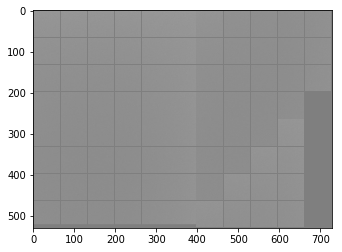

GroundTruth:	 defect
Predicted:	 intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact intact


In [5]:
import torch
import numpy as np
from torchvision import transforms, utils
from torch.autograd import Variable
from torch.utils.data import DataLoader
from my_data_set_for_predict import MyDataset, show_batch
from matplotlib import pyplot as plt

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg))
    plt.show()

classes = ('intact', 'defect')
f = open('train_labels.txt', 'r')
i = 0


path = 'train_data//train_img_0900.jpg'
label = -1
if 'NG' in line:
    label = 1
else:
    label = 0

test_data=MyDataset(txt=path, transform=transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor()
]))
data_loader = DataLoader(test_data, batch_size=48+35,shuffle=False)
print(len(data_loader))

testloader = data_loader
net = torch.load('net.pkl').cuda() # 必须转换到GPU
dataiter = iter(testloader)
images = dataiter.next()
imshow(utils.make_grid(images,nrow=8))  # nrow是每行显示的图片数量，缺省值为8
print('GroundTruth:\t', classes[label])  # 打印前25个GT（test集里图片的标签）
outputs = net(Variable(images).cuda())
_, predicted = torch.max(outputs.data, 1)
print('Predicted:\t', " ".join('%5s' % classes[predicted[j]] for j in range(48+35)))  # 打印前25个预测值
    
# test_data=MyDataset(txt='tail_test.txt', transform=transforms.ToTensor())
# data_loader = DataLoader(test_data, batch_size=100,shuffle=True)
# print(len(data_loader))

# testloader = data_loader
# net = torch.load('net.pkl').cuda() # 必须转换到GPU
# dataiter = iter(testloader)  
# images, labels = dataiter.next()
# imshow(utils.make_grid(images,nrow=5))  # nrow是每行显示的图片数量，缺省值为8
# print('GroundTruth:\t', " ".join('%5s' % classes[labels[j]] for j in range(25)))  # 打印前25个GT（test集里图片的标签）
# outputs = net(Variable(images).cuda())  
# _, predicted = torch.max(outputs.data, 1)

# print('Predicted:\t', " ".join('%5s' % classes[predicted[j]] for j in range(25)))  # 打印前25个预测值